# Problem: Use kNN to Predict the Age of Sea Slugs

In [72]:
# SRC: https://realpython.com/knn-python/

from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abalone = pd.read_csv(url, header=None)
abalone.head()

0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

In [73]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone = abalone.drop("Sex", axis=1)
abalone.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

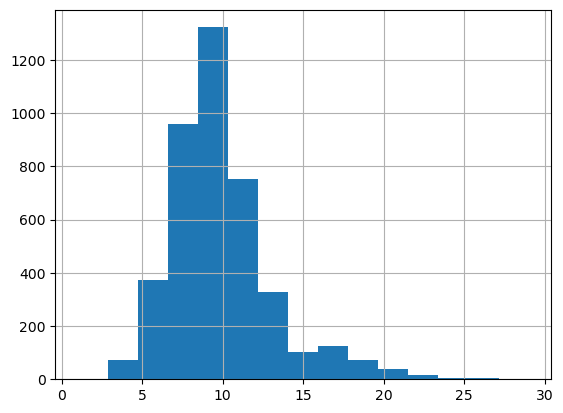

In [74]:
abalone["Rings"].hist(bins=15)
plt.show()


In [75]:
correlation_matrix = abalone.corr(numeric_only=True)
correlation_matrix["Rings"]


Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

## Define “Nearest” Using a Mathematical Definition of Distance

In [76]:
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)  # Euclidian distance (L2-norm)


2.8284271247461903

## Find the k Nearest Neighbors

In [77]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values
X


array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [78]:
new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208,
])

distances = np.linalg.norm(X - new_data_point, axis=1)
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids


array([4045, 1902, 1644])

In [79]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings


array([ 9, 11, 10])

In [80]:
prediction = nearest_neighbor_rings.mean()
prediction


10.0

In [81]:
class_neighbors = np.array(["A", "B", "B", "C",  "C"])
pd.DataFrame(class_neighbors).mode()


0
0  B
1  C

# basic kNN (sklearn)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse


1.6538366794859511

In [84]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse


2.375417924000521

## plotting model fit

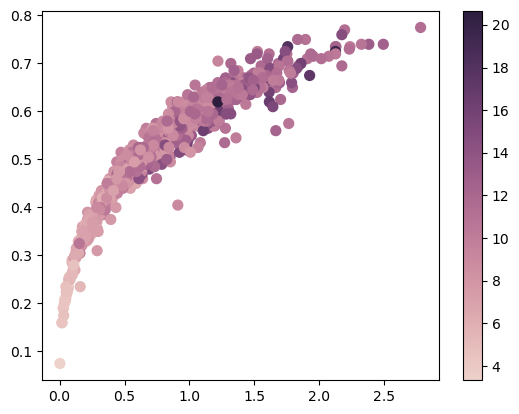

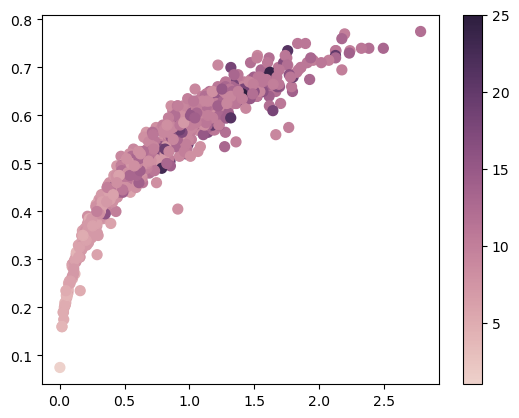

In [85]:
import seaborn as sns
col_1, col_2 = (3, 0)
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, col_1], X_test[:, col_2], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, col_1], X_test[:, col_2], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()


# Tuning the model

## GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [87]:
gridsearch.best_params_


{'n_neighbors': 25}

In [88]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
print(train_rmse)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(test_rmse)


2.0731180327543384
2.1700197339962175


## Weighted Average


In [89]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse


{'n_neighbors': 25, 'weights': 'distance'}


2.1634265584947485

## Bagging


In [90]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)


In [91]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

bagging_model.fit(X_train, y_train)
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse


2.163142500203095